In [103]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# Read csv file from github
# https://github.com/nytimes/covid-19-data
# State Data
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

df_states = pd.read_csv(url)
df_states['date'] = pd.to_datetime(df_states['date'])

### DataFrame info

In [105]:
df_states.describe()

,fips,cases,deaths
count,41726.000000,4.172600e+04,41726.000000
mean,32.108541,5.107918e+05,8357.534535
std,18.730127,8.837299e+05,13212.618423
min,1.000000,1.000000e+00,0.000000
25%,17.000000,3.196875e+04,600.000000
50%,31.000000,1.826635e+05,2970.500000
75%,46.000000,6.238032e+05,10148.000000
max,78.000000,9.088616e+06,88709.000000


In [106]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41726 entries, 0 to 41725
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    41726 non-null  datetime64[ns]
 1   state   41726 non-null  object        
 2   fips    41726 non-null  int64         
 3   cases   41726 non-null  int64         
 4   deaths  41726 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.6+ MB


In [107]:
df_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


### Overall Cases, Deaths

<AxesSubplot:xlabel='date'>

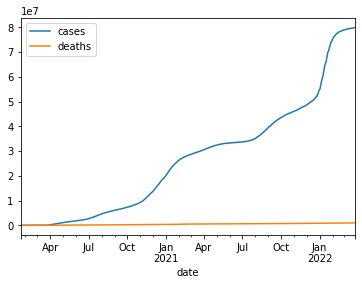

In [108]:
dff = df_states[['cases', 'deaths']].groupby(df_states['date']).sum()
dff.plot()

## Total Cases, Deaths

In [109]:
# narror down data to most recent date
current = df_states[df_states['date']== df_states['date'].max()] 
current[['cases', 'deaths']].sum()

cases     79852810
deaths      975515
dtype: int64

<AxesSubplot:>

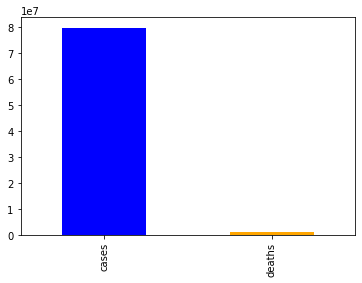

In [110]:
current[['cases', 'deaths']].sum().plot(kind='bar', color=['blue', 'orange'])

In [111]:
current.value_counts()[:10]

date        state                     fips  cases    deaths
2022-03-27  Alabama                   1     1292508  19210     1
            Alaska                    2     244800   1186      1
            Nevada                    32    712404   10053     1
            New Hampshire             33    301777   2445      1
            New Jersey                34    2195320  33212     1
            New Mexico                35    517225   7208      1
            New York                  36    4966262  67276     1
            North Carolina            37    2626216  23184     1
            North Dakota              38    239675   2279      1
            Northern Mariana Islands  69    11022    33        1
dtype: int64

In [112]:
df_grouped_states = current[['cases', 'deaths']].groupby(current['state']).sum()
df_grouped_states.head()

,cases,deaths
state,,
Alabama,1292508,19210
Alaska,244800,1186
American Samoa,2953,0
Arizona,1997037,28883
Arkansas,832553,11210


## Top 5 States (Cases, Deaths)

In [113]:
df_grouped_states_top5 = df_grouped_states.sort_values(['cases', 'deaths'], ascending=False)[:5]
df_grouped_states_top5

,cases,deaths
state,,
California,9088616,88709
Texas,6668425,87328
Florida,5841469,73027
New York,4966262,67276
Illinois,3066843,37589


<AxesSubplot:xlabel='state'>

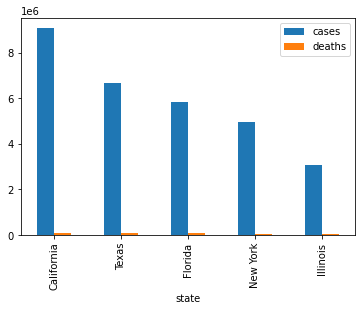

In [114]:
df_grouped_states_top5.plot(kind='bar')

## Cases Last 5 Days

In [115]:
last_5cases = df_states['cases'].groupby(df_states['date']).sum()
last_5cases.tail()

date
2022-03-23    79762066
2022-03-24    79799812
2022-03-25    79833289
2022-03-26    79845312
2022-03-27    79852810
Name: cases, dtype: int64

<AxesSubplot:xlabel='date'>

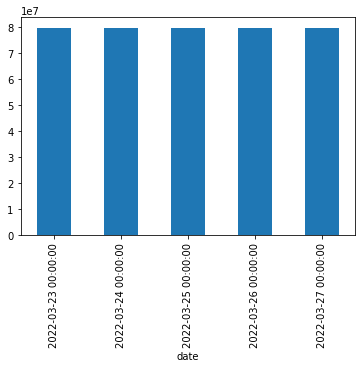

In [116]:
last_5cases.tail().plot(kind='bar')

## Deaths Last 5 Days

In [117]:
last_5deaths = df_states['deaths'].groupby(df_states['date']).sum()
last_5deaths.tail()

date
2022-03-23    973459
2022-03-24    974441
2022-03-25    975302
2022-03-26    975465
2022-03-27    975515
Name: deaths, dtype: int64

<AxesSubplot:xlabel='date'>

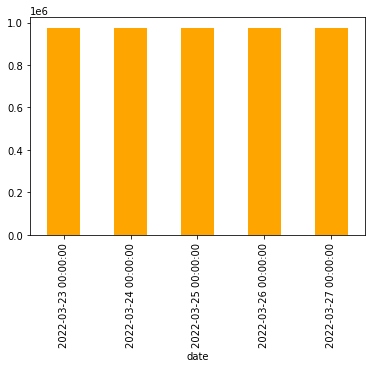

In [118]:
last_5deaths.tail().plot(kind='bar', color=['orange'])